# Recommendation ML
- I have been given data of aorund 5,000 surveys conducted by 10-minute school for their customers with 19 unique columns (features)
- My first objective was to find out which features best correspond to the target variable, which in this case is "How likely is the student to recommend 10MS to a friend?"
- Later using the selected features, my goal was to make an effective model which is able to predict the outcome of how likely a customer is to recommend 10MS.



- intention to create a predictive model for customer recommendations based on the selected features.

## Raw data given

In [1449]:
import pandas as pd
data = pd.read_csv('Demo Data(1).csv')
data

,At what type of location do you live?,Are you a 10MS Paid User or not?,Gender,Location (District),Location (Division),Which grade is the student in?,What is the highest level of education of the students' parents?,At what type of school does the student pursue full-time education?,How does the student (or their family) fund the student's education?,What was the student's marks in their most recent academic year?,Does the student have his/her own mobile phone or uses a shared mobile phone?,"On a scale of 1-5 with 1 being Strongly Disagree to 5 Strongly Agree, has the student has seen an improvement in their learning since they started using 10MS.",How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely)),"What is the monthly income of the student's household? (Please ask your parent, in case you are a student)",What is the amount of monthly school fees paid for the student? (in BDT)\n,"What is the cost of after-school tuition class for the student, per subject per month?",Why did you choose to use 10MS? (Can select more than one),"If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)",What would you like to see at 10MS in future?,Unnamed: 19
0,Village/Sub-district,Yes,Male,Jamalpur,Mymensingh,Grade 11,Up to Masters,"Public school, government run",Self-pay/Sourced from Family,80 to 100,Own mobile phone,4,10,"BDT 24,000 - 45,000","200,000","5,000",Content quality,The student feels more motivated in their stud...,More Subjects,NaN
1,Village/Sub-district,No,Male,Thakurgaon,Rangpur,Grade 11,Up to Masters,"Public school, government run",Self-pay/Sourced from Family,80 to 100,Own mobile phone,5,10,"BDT 16,000 - 24,000","150,000","3,000",Content quality,The student feels more motivated in their stud...,More Subjects,NaN
2,District City,Yes,Female,Faridpur,Dhaka,Grade 10,Up to University (Bachelor's),Private school,Self-pay/Sourced from Family,80 to 100,Own mobile phone,2,5,"> BDT 45,000","100,000","1,350","Convenience, no need to travel",No improvement was seen,More Subjects,NaN
3,District City,Yes,Male,Jhenaidah,Khulna,Grade 11,Up to Masters,"Public school, government run",Self-pay/Sourced from Family,80 to 100,Shared mobile phone within the family,3,9,"> BDT 45,000","100,000","19,000",Quality of teachers,The student feels more effective/efficient in ...,More classes for low connectivity locations (l...,NaN
4,Village/Sub-district,No,Male,Sunamganj,Sylhet,Grade 11,Up to University (Bachelor's),"Public school, government run",Self-pay/Sourced from Family,60 to 70,Own mobile phone,3,10,"< BDT 12,000","100,000","6,000",Content quality,The student feels more motivated in their stud...,More Subjects,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,Village/Sub-district,Yes,Male,Chittagong,Chittagong,Grade 10,Upto Grade 10,"Public school, government run",Self-pay/Sourced from Family,70 to 80,Shared mobile phone within the family,5,10,"< BDT 12,000",0,0,Content quality,The student feels more motivated in their stud...,More Subjects,NaN
4702,Village/Sub-district,Yes,Male,Jessore,Khulna,Grade 12,Upto Grade 10,"Public school, government run",Self-pay/Sourced from Family,80 to 100,Own mobile phone,5,10,"< BDT 12,000",0,0,Content quality,The student feels more motivated in their stud...,More Subjects,NaN
4703,Village/Sub-district,No,Male,Thakurgaon,Rangpur,Grade 10,Up to University (Bachelor's),"Public school, government run",Self-pay/Sourced from Family,80 to 100,Do not own or share a mobile,3,7,"< BDT 12,000",0,"1,000",Cheaper cost of access,The student feels more effective/efficient in ...,Lower cost,NaN
4704,Village/Sub-district,Yes,Male,Dinajpur,Rangpur,Grade 05,Up to University (Bachelor's),"Public school, government run",Other,80 to 100,Do not own or share a mobile,4,8,"BDT 16,000 - 24,000",0,400,Quality of teachers,The student feels more effective/efficient in ...,Lower cost,NaN


## Data cleaning
-Majority of the data was already cleaned

-Some missing values were found which were converted to 0

-All the input must be converted into numerical values for the model to work

In [1450]:
import warnings
warnings.filterwarnings("ignore")

# drop the first 500 rows because they are the outliers
data.drop(index=range(501), inplace=True)
data = data.drop(columns=["Unnamed: 19"])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data['Are you a 10MS Paid User or not?'] = le.fit_transform(data['Are you a 10MS Paid User or not?'])
data['At what type of location do you live? '] = le.fit_transform(data['At what type of location do you live? '])
data['At what type of school does the student pursue full-time education?'] = le.fit_transform(data['At what type of school does the student pursue full-time education?'])
data["How does the student (or their family) fund the student's education? "] = le.fit_transform(data["How does the student (or their family) fund the student's education? "])
data["What was the student's marks in their most recent academic year?"] = le.fit_transform(data["What was the student's marks in their most recent academic year?"])
data["Does the student have his/her own mobile phone or uses a shared mobile phone?"] = le.fit_transform(data["Does the student have his/her own mobile phone or uses a shared mobile phone?"])
data["What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)"] = le.fit_transform(data["What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)"])
data["Why did you choose to use 10MS? (Can select more than one)"] = le.fit_transform(data["Why did you choose to use 10MS? (Can select more than one)"])
data["If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)"] = le.fit_transform(data["If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)"])
data["What would you like to see at 10MS in future?"] = le.fit_transform(data["What would you like to see at 10MS in future?"])
data["Location (District)"] = le.fit_transform(data["Location (District)"])
data["Location (Division)"] = le.fit_transform(data["Location (Division)"])
data["What is the highest level of education of the students' parents?"] = le.fit_transform(data["What is the highest level of education of the students' parents?"])


data['Are you a 10MS Paid User or not?'] = data['Are you a 10MS Paid User or not?'].astype("category")
data['At what type of location do you live? '] = data['At what type of location do you live? '].astype("category")
data['At what type of school does the student pursue full-time education?'] = data['At what type of school does the student pursue full-time education?'].astype("category")
data["How does the student (or their family) fund the student's education? "] = data["How does the student (or their family) fund the student's education? "].astype("category")
data["What was the student's marks in their most recent academic year?"] = data["What was the student's marks in their most recent academic year?"].astype("category")
data["Does the student have his/her own mobile phone or uses a shared mobile phone?"] = data["Does the student have his/her own mobile phone or uses a shared mobile phone?"].astype("category")
data["What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)"] = data["What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)"].astype("category")
data["Why did you choose to use 10MS? (Can select more than one)"] = data["Why did you choose to use 10MS? (Can select more than one)"].astype("category")
data["If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)"] = data["If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)"].astype("category")
data["What would you like to see at 10MS in future?"] = data["What would you like to see at 10MS in future?"].astype("category")



data.loc[1143,"What is the cost of after-school tuition class for the student, per subject per month?"] = 0
data.loc[4266, "What is the cost of after-school tuition class for the student, per subject per month?"] = 0

#data = data.drop(columns = ['Location (Division)', 'Unnamed: 19', "What is the highest level of education of the students' parents?"])
#data = data.drop(columns = ["What is the amount of monthly school fees paid for the student? (in BDT)\n"])
#data = data.drop(columns = ["What is the cost of after-school tuition class for the student, per subject per month?"])
#data = data.drop(columns = ['Which grade is the student in?'])
#data = data.drop(columns = ["How does the student (or their family) fund the student's education? "])
#data = data.drop(columns = ["Does the student have his/her own mobile phone or uses a shared mobile phone?"])
#data = data.drop(columns = ["What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)"])

data["What is the amount of monthly school fees paid for the student? (in BDT)\n"]=data["What is the amount of monthly school fees paid for the student? (in BDT)\n"].astype(str).str.replace(',', '').astype(float)
data["What is the cost of after-school tuition class for the student, per subject per month?"] = data["What is the cost of after-school tuition class for the student, per subject per month?"].astype(str)
data['What is the cost of after-school tuition class for the student, per subject per month?'] = data['What is the cost of after-school tuition class for the student, per subject per month?'].str.replace(' ', '').str.replace(',', '').astype(float)
data['Which grade is the student in?'] = data['Which grade is the student in?'].str.replace('Grade', '').str.strip().astype(float)
data


,At what type of location do you live?,Are you a 10MS Paid User or not?,Gender,Location (District),Location (Division),Which grade is the student in?,What is the highest level of education of the students' parents?,At what type of school does the student pursue full-time education?,How does the student (or their family) fund the student's education?,What was the student's marks in their most recent academic year?,Does the student have his/her own mobile phone or uses a shared mobile phone?,"On a scale of 1-5 with 1 being Strongly Disagree to 5 Strongly Agree, has the student has seen an improvement in their learning since they started using 10MS.",How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely)),"What is the monthly income of the student's household? (Please ask your parent, in case you are a student)",What is the amount of monthly school fees paid for the student? (in BDT)\n,"What is the cost of after-school tuition class for the student, per subject per month?",Why did you choose to use 10MS? (Can select more than one),"If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)",What would you like to see at 10MS in future?
501,1,1,1,53,5,12.0,2,0,3,2,1,4,10,4,12000.0,0.0,1,2,1
502,0,1,1,20,4,12.0,2,0,3,0,1,5,10,3,12000.0,5000.0,1,2,1
503,0,1,0,47,1,11.0,4,1,3,2,3,5,10,3,12000.0,8000.0,1,1,1
504,1,1,1,12,2,11.0,2,0,3,3,1,2,8,1,12000.0,17000.0,1,1,3
505,0,1,1,40,3,11.0,4,1,3,2,1,4,10,3,12000.0,6000.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,2,1,1,8,1,10.0,4,1,3,1,3,5,10,0,0.0,0.0,1,2,1
4702,2,1,1,21,3,12.0,4,1,3,2,1,5,10,0,0.0,0.0,1,2,1
4703,2,0,1,63,6,10.0,3,1,3,2,0,3,7,0,0.0,1000.0,0,1,0
4704,2,1,1,13,6,5.0,3,1,2,2,0,4,8,3,0.0,400.0,5,1,0


# Split data 
- X consists of all the feature column
- y consists of the target column which is "How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely))"

In [1451]:
X = data.drop(columns = ["How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely))"])
y = data["How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely))"]

# Finding the best features 
- All the functions examine each feature individually to determine the strength of the relationship between the feature and the target values
- we want to identify the features that have the highest correlation with our target values
- the first function used is SelectKBest() default function
- below is also a bar graph of the resultant data for visualization

In [1452]:
from sklearn.feature_selection import SelectKBest
BestFeature = SelectKBest()
fit = BestFeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']
print(featureScores.nlargest(100,'Score'))


                                               Column       Score
11  On a scale of 1-5 with 1 being Strongly Disagr...  119.261819
16  If any, which of the following improvements ha...   15.863163
1                    Are you a 10MS Paid User or not?   13.084408
12  What is the monthly  income of the student's h...    7.042094
2                                              Gender    5.452780
14  What is the cost of after-school tuition class...    5.212157
15  Why did you choose to use 10MS? (Can select mo...    5.084751
5                      Which grade is the student in?    4.356928
0              At what type of location do you live?     3.833659
8   How does the student (or their family) fund th...    2.658375
17      What would you like to see at 10MS in future?    2.001926
13  What is the amount of monthly school fees paid...    1.911647
7   At what type of school does the student pursue...    1.615130
10  Does the student have his/her own mobile phone...    1.552955
9   What w

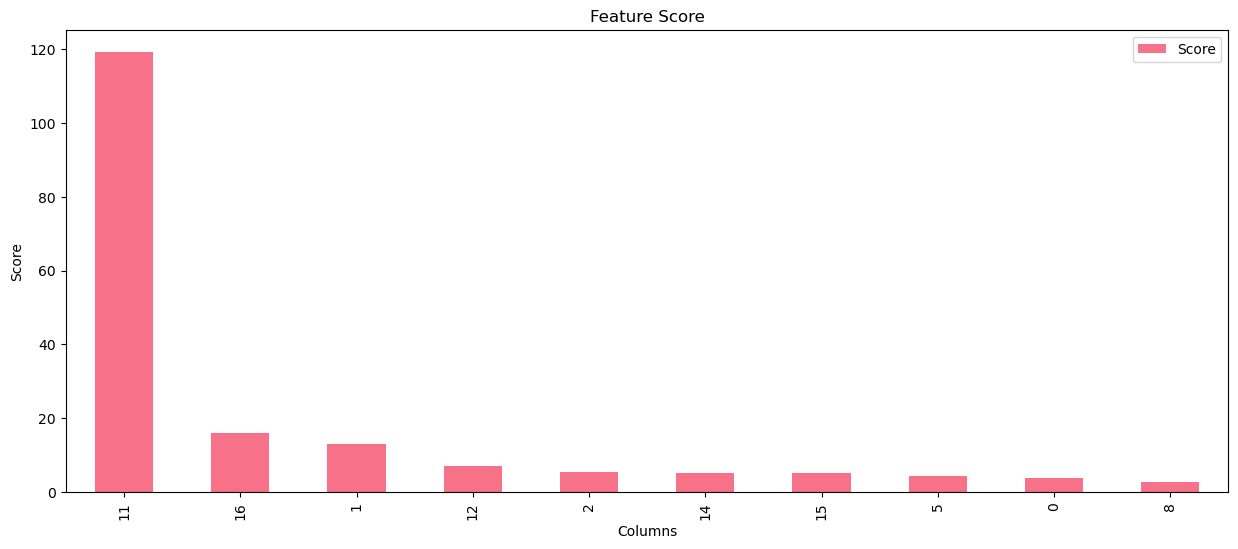

In [1356]:
featureScores.nlargest(10,'Score').plot(kind='bar',figsize=(15,6),color=sns.color_palette("husl"))
plt.xlabel('Columns')
plt.ylabel('Score')
plt.title('Feature Score')
plt.show()

#### - Chi-squared function is used on the same set of data (result is set to largest to smallest)

In [1453]:
from sklearn.feature_selection import chi2
BestFeature = SelectKBest(score_func=chi2, k=18)
fit = BestFeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores= pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Column','Score']
featureScores
print(featureScores.nlargest(19,'Score'))

                                               Column         Score
14  What is the cost of after-school tuition class...  4.441216e+09
13  What is the amount of monthly school fees paid...  5.663673e+04
11  On a scale of 1-5 with 1 being Strongly Disagr...  2.313980e+02
3                                 Location (District)  2.019544e+02
12  What is the monthly  income of the student's h...  8.588416e+01
15  Why did you choose to use 10MS? (Can select mo...  8.287703e+01
16  If any, which of the following improvements ha...  4.299062e+01
1                    Are you a 10MS Paid User or not?  4.214390e+01
4                                 Location (Division)  1.758212e+01
0              At what type of location do you live?   1.749041e+01
2                                              Gender  1.733943e+01
17      What would you like to see at 10MS in future?  1.635395e+01
10  Does the student have his/her own mobile phone...  8.671653e+00
9   What was the student's marks in their most r

#### - mutual_info_classif function is used

In [1454]:
from sklearn.feature_selection import mutual_info_classif
BestFeature = SelectKBest(score_func = mutual_info_classif, k=18)
fit = BestFeature.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores1 = pd.concat([dfcolumns,dfscores], axis=1)
featureScores1.columns = ['Column','Score']
print(featureScores1.nlargest(19,'Score'))

                                               Column     Score
11  On a scale of 1-5 with 1 being Strongly Disagr...  0.157171
16  If any, which of the following improvements ha...  0.047352
15  Why did you choose to use 10MS? (Can select mo...  0.039434
9   What was the student's marks in their most rec...  0.024360
7   At what type of school does the student pursue...  0.016345
5                      Which grade is the student in?  0.014731
1                    Are you a 10MS Paid User or not?  0.014483
8   How does the student (or their family) fund th...  0.007559
14  What is the cost of after-school tuition class...  0.007015
4                                 Location (Division)  0.006409
12  What is the monthly  income of the student's h...  0.003855
10  Does the student have his/her own mobile phone...  0.003629
6   What is the highest level of education of the ...  0.002783
3                                 Location (District)  0.002491
0              At what type of location 

#### - Recursive Feature Elimination (RFE) is employed, which involves iteratively eliminating features and building the model based on the remaining features
#### - The attached image displays the results of the algorithm, with false features identified by the algorithm being crossed out
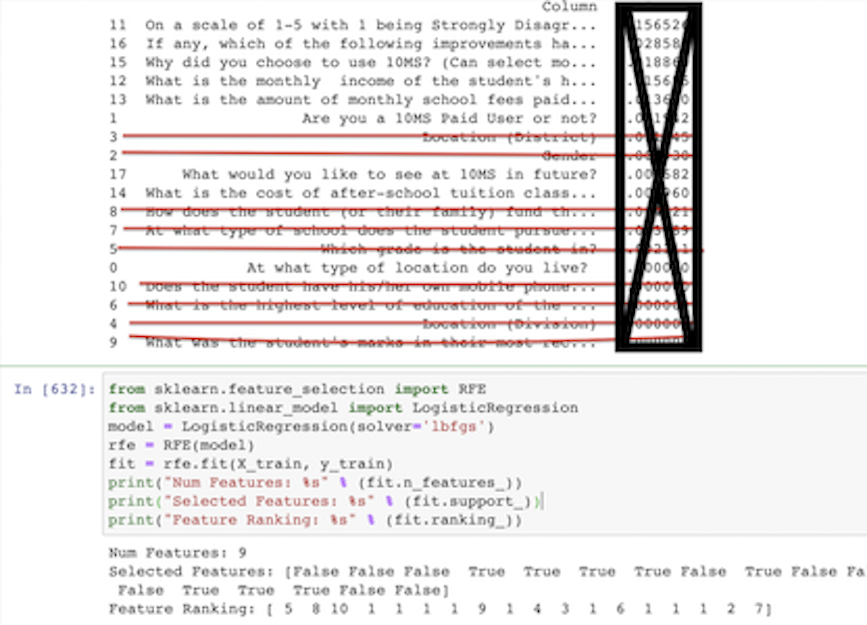

In [1455]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 9
Selected Features: [False False False  True  True  True  True False  True False False  True
 False  True  True False  True False]
Feature Ranking: [ 5  8 10  1  1  1  1  9  1  4  3  1  7  1  1  2  1  6]


#### - DecisionTreeRegressor is utilized to estimate the importance of each feature
#### - a bar graph is also provided for visualization

Feature: 0, Score: 0.11535
Feature: 1, Score: 0.31561
Feature: 2, Score: 0.15829
Feature: 3, Score: 0.03471
Feature: 4, Score: 0.00513
Feature: 5, Score: 0.00637
Feature: 6, Score: 0.12273
Feature: 7, Score: 0.06969
Feature: 8, Score: 0.00890
Feature: 9, Score: 0.00663
Feature: 10, Score: 0.00603
Feature: 11, Score: 0.00539
Feature: 12, Score: 0.01888
Feature: 13, Score: 0.07609
Feature: 14, Score: 0.00797
Feature: 15, Score: 0.00518
Feature: 16, Score: 0.02972
Feature: 17, Score: 0.00733


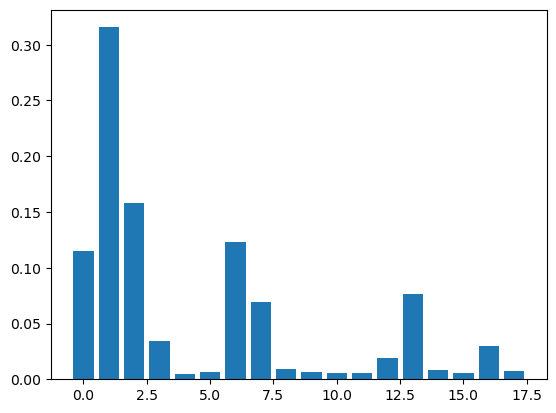

In [1456]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
X, y = make_regression(n_samples=3500, n_features=18, n_informative=9, random_state=18)
model = DecisionTreeRegressor()
model.fit(X,y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


# Scaling the Data:
- majority of Algorithms are more reliable when the data is scaled
- All data is scaled to values of 0s and 1s

In [1461]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ["At what type of location do you live? ","Are you a 10MS Paid User or not?","Gender","Location (District)","Location (Division)","Which grade is the student in?",
"What is the highest level of education of the students' parents?","At what type of school does the student pursue full-time education?","How does the student (or their family) fund the student's education? ",
"What was the student's marks in their most recent academic year?","Does the student have his/her own mobile phone or uses a shared mobile phone?",
"On a scale of 1-5 with 1 being Strongly Disagree to 5 Strongly Agree, has the student has seen an improvement in their learning since they started using 10MS."
,"What is the monthly  income of the student's household? (Please ask your parent, in case you are a student)",
"What is the amount of monthly school fees paid for the student? (in BDT)\n","What is the cost of after-school tuition class for the student, per subject per month?",
"Why did you choose to use 10MS? (Can select more than one)","If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)","What would you like to see at 10MS in future?"]
data[columns_to_scale] = StandardScaler.fit_transform(data[columns_to_scale])
data.head()

,At what type of location do you live?,Are you a 10MS Paid User or not?,Gender,Location (District),Location (Division),Which grade is the student in?,What is the highest level of education of the students' parents?,At what type of school does the student pursue full-time education?,How does the student (or their family) fund the student's education?,What was the student's marks in their most recent academic year?,Does the student have his/her own mobile phone or uses a shared mobile phone?,"On a scale of 1-5 with 1 being Strongly Disagree to 5 Strongly Agree, has the student has seen an improvement in their learning since they started using 10MS.",How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely)),"What is the monthly income of the student's household? (Please ask your parent, in case you are a student)",What is the amount of monthly school fees paid for the student? (in BDT)\n,"What is the cost of after-school tuition class for the student, per subject per month?",Why did you choose to use 10MS? (Can select more than one),"If any, which of the following improvements has the student witnessed due to using 10MS? (can choose multiple ones)",What would you like to see at 10MS in future?
501,-0.367041,0.70383,0.688019,1.451632,1.001654,0.944208,-0.603756,-1.242521,0.358664,0.489655,-0.774131,0.050160,10,1.459637,2.650646,-0.017920,-0.686136,0.503741,-0.434369
502,-1.670593,0.70383,0.688019,-0.291857,0.509948,0.944208,-0.603756,-1.242521,0.358664,-1.784228,-0.774131,1.059369,10,0.791979,2.650646,-0.014677,-0.686136,0.503741,-0.434369
503,-1.670593,0.70383,-1.453447,1.134634,-0.965171,0.106749,1.055044,0.804815,0.358664,0.489655,1.236506,1.059369,10,0.791979,2.650646,-0.012732,-0.686136,-0.963178,-0.434369
504,-0.367041,0.70383,0.688019,-0.714521,-0.473464,0.106749,-0.603756,-1.242521,0.358664,1.626597,-0.774131,-1.968257,8,-0.543335,2.650646,-0.006895,-0.686136,-0.963178,1.383970
505,-1.670593,0.70383,0.688019,0.764803,0.018242,0.106749,1.055044,0.804815,0.358664,0.489655,-0.774131,0.050160,10,0.791979,2.650646,-0.014029,-0.686136,0.503741,-0.434369


### These are the top features found from each function and then I chose the ones which overlaps the most
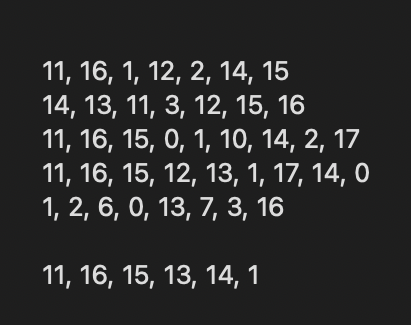

In [1462]:
data.iloc[:, [11, 16, 15, 13, 14, 1]]

,"On a scale of 1-5 with 1 being Strongly Disagree to 5 Strongly Agree, has the student has seen an improvement in their learning since they started using 10MS.",Why did you choose to use 10MS? (Can select more than one),"What is the cost of after-school tuition class for the student, per subject per month?","What is the monthly income of the student's household? (Please ask your parent, in case you are a student)",What is the amount of monthly school fees paid for the student? (in BDT)\n,Are you a 10MS Paid User or not?
501,0.050160,-0.686136,-0.017920,1.459637,2.650646,0.703830
502,1.059369,-0.686136,-0.014677,0.791979,2.650646,0.703830
503,1.059369,-0.686136,-0.012732,0.791979,2.650646,0.703830
504,-1.968257,-0.686136,-0.006895,-0.543335,2.650646,0.703830
505,0.050160,-0.686136,-0.014029,0.791979,2.650646,0.703830
...,...,...,...,...,...,...
4701,1.059369,-0.686136,-0.017920,-1.210992,-1.082791,0.703830
4702,1.059369,-0.686136,-0.017920,-1.210992,-1.082791,0.703830
4703,-0.959048,-1.194811,-0.017272,-1.210992,-1.082791,-1.420797
4704,0.050160,1.348563,-0.017661,0.791979,-1.082791,0.703830


# Experiment with multiple algorithms 

### 1 - Model Training: Train each selected algorithm using the training data.

### 2 - Model Evaluation: Evaluate the performance of each model using appropriate evaluation metrics such as accuracy, r2, mean absolute error

## Create training data and testing data
- training data and testing data is divided into 8:2 ratio 

In [1471]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("X_train -", X_train.shape,"    y_train -", X_test.shape)

X_train - (3364, 6)     y_train - (841, 6)


### LinearRegression

In [1472]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
X = data.iloc[:, [11, 16, 15, 13, 14, 1]]
# X = data.drop(columns = ["How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely))"])

y = data["How likely is the student to recommend 10MS to a friend? (10 (very likely) to 1 (very unlikely))"]
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("Mean absolute error - ", mae)
print("r2 score - ", r2)

Mean absolute error -  1.5355692539868884
r2 score -  0.2056083296952811


### LogisticRegression

In [1473]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model2 = LogisticRegression()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
r2 = r2_score(y_test, pred2)
print("r2 score -", r2)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred2)
#print(cm)

accuracy = accuracy_score(y_test, pred2)
print("accuracy score - ", accuracy)
#y_probabilities = model.predict_proba(X_test)[:, 1]

#from sklearn.metrics import roc_auc_score
#auc_score = roc_auc_score(y_test,y_probabilities)
#print("AUC Score:", auc_score)


r2 score - -0.30800277991038083
accuracy score -  0.5101070154577884


[[  0   0   0   0   0   3   0   1   0   0   8]
 [  0   0   0   0   0   3   0   0   0   0   5]
 [  0   0   0   0   0   1   0   0   0   0   5]
 [  0   0   0   0   0   3   0   1   0   0  18]
 [  0   0   0   0   0   7   0   1   0   0  13]
 [  0   0   0   0   0   9   0   2   0   0  50]
 [  0   0   0   0   0   2   0   1   0   0  30]
 [  0   0   0   0   0   0   0   0   0   0  63]
 [  0   0   0   0   0   1   0   0   0   0  97]
 [  0   0   0   0   0   2   0   1   0   0  83]
 [  0   0   0   2   0   6   0   3   0   0 420]]


<Axes: >

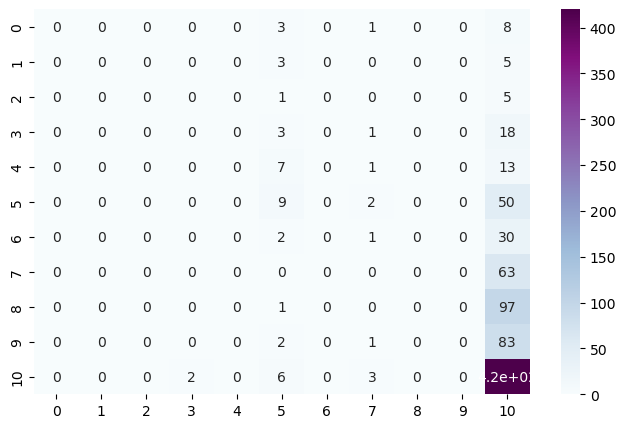

In [1474]:
cm = confusion_matrix(y_test,pred2)
print(cm)
plt.subplots(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap="BuPu")

### RandomForestRegressor

In [1447]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
r2 = r2_score(y_test, pred3)
mae2 = mean_absolute_error(y_test, pred3)
print("Mean absolute error - ", mae2,)
print("r2 score - ", r2)


Mean absolute error -  1.7735484878115677
r2 score -  -0.0027178062108328405


### LinearSVC

In [1485]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model4 = LinearSVC()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
r2 = r2_score(y_test, pred4)
accuracy = accuracy_score(y_test, pred4)
print("R2 score: ", r2)
print("Accuracy score: ", accuracy)

R2 score:  -0.3075807754645312
Accuracy score:  0.5077288941736029


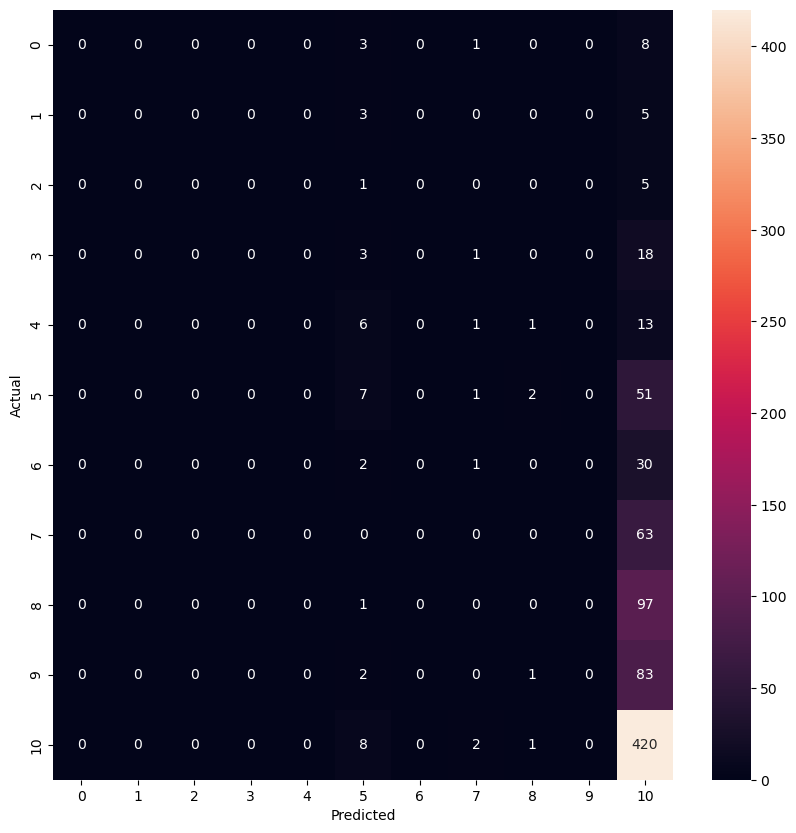

In [1486]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred4)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### GaussianNB

In [1477]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
accu = accuracy_score(y_test, pred5)
print("accuracy score - ", accu)

accuracy score -  0.49108204518430437


In [1369]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [1491]:
y_train.shape

(3364,)

### adding data to minority features to balance the data set

In [1490]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')  # You can adjust the sampling strategy
X_sm, y_sm = smote.fit_resample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(5003, 6) (5003,)


### GXBoost - Gradient boosting

In [1492]:
import xgboost as xgb
model6 = xgb.XGBClassifier()
model6.fit(X_sm, y_sm)
pred6 = model6.predict(X_test)
accu = accuracy_score(y_test, pred6)
print("accuracy score - ", accu)

accuracy score -  0.45422116527942924


In [1373]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Sequential

In [1374]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()


model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_sm, y_sm, epochs=6, validation_data=(X_test, y_test),)
score, accuracy = model.evaluate(X_test, y_test)
print("Test score:", score)
print("Test accuracy:", accuracy)


Epoch 1/6
157/157 [==============================] - 0s 853us/step - loss: -48.6946 - accuracy: 0.0088 - val_loss: -242.9898 - val_accuracy: 0.0083
Epoch 2/6
157/157 [==============================] - 0s 516us/step - loss: -677.5864 - accuracy: 0.0084 - val_loss: -2121.8291 - val_accuracy: 0.0083
Epoch 3/6
157/157 [==============================] - 0s 500us/step - loss: -3170.2549 - accuracy: 0.0084 - val_loss: -7606.0527 - val_accuracy: 0.0083
Epoch 4/6
157/157 [==============================] - 0s 562us/step - loss: -8837.2441 - accuracy: 0.0084 - val_loss: -18394.7090 - val_accuracy: 0.0083
Epoch 5/6
157/157 [==============================] - 0s 500us/step - loss: -18756.2715 - accuracy: 0.0084 - val_loss: -35889.6953 - val_accuracy: 0.0083
Epoch 6/6
27/27 [==============================] - 0s 310us/step - loss: -61253.0703 - accuracy: 0.0083
Test score: -61253.0703125
Test accuracy: 0.008323424495756626


### Decision Tree Regressor

In [1506]:
from sklearn.tree import DecisionTreeRegressor
model7 = DecisionTreeRegressor()
model7.fit(X_sm, y_sm)
pred7 = model7.predict(X_test)
# accu = accuracy_score(y_test, pred7)
r2_sc = r2_score(y_test, pred7)
print("r2 score - ", r2_sc)

r2 score -  -0.6936755149468969


### Standard Scaler (this is for unsupervised learning so it won't work with my project)

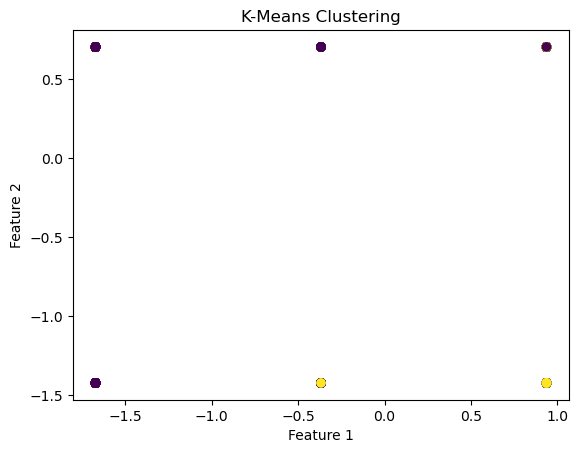

Cluster Centers:
 [[-0.21371119 -0.00328644 -0.09820364 -0.57309618 -0.54722983 -0.06700881
  -0.15019275 -0.13160652  0.10073601 -0.01633397  0.05633255 -0.08917497
  -0.06605617  0.21547184  0.02060343  0.009669    0.01007915 -0.10893672
   0.0519473 ]
 [ 0.34376745  0.00528645  0.15796653  0.92186005  0.88025244  0.10778775
   0.24159417  0.21169709 -0.16203999  0.02627418 -0.09061432  0.14344336
   0.10625537 -0.34659956 -0.03314187 -0.01555318 -0.01621293  0.17523134
  -0.08356039]]


In [1487]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

# Visualize clusters (for 2D data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:\n", cluster_centers)